# Training Classifiers
### Procedures:
- Add your collected dataset to variable [your_org]_dataset
- Split your dataset by article in to tuples of (article, 'news_org') and append to docs
- Tokenize words, then append them to all_words
- In the Visualization cell, add your news org to the classes list

In [1]:
import nltk
import random 
import numpy
import scipy
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

#############################################
# ADD YOUR DATASET HERE
cnn_dataset = open('./Datasets/cnn_dataset', 'r').read()
bbc_dataset = open('./Datasets/bbc_dataset', 'r').read()

#############################################

#def clean_dataset(dataset):
#    cleanset = []
#    for word in dataset:
#        if word not in stopwords:
#            cleanset.append(word)
#    return cleanset

#cnn_cleanset = clean_dataset(cnn_dataset)
#bbc_cleanset = clean_dataset(bbc_dataset)

docs = []
all_words = []

#################################################
# APPEND TUPLES TO DOC
for r in cnn_dataset.split('\n'):
    docs.append((r, 'cnn'))
    
for r in bbc_dataset.split('\n'):
    docs.append((r, 'bbc'))

# TOKENIZE    
cnn_words = nltk.word_tokenize(cnn_dataset)
bbc_words = nltk.word_tokenize(bbc_dataset)

# APPEND LOWERCASE WORDS TO ALL WORDS
for w in cnn_words:
    all_words.append(w.lower())
    
for w in bbc_words:
    all_words.append(w.lower())

###################################################    
    
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())

def find_features(doc):
    words = nltk.word_tokenize(doc)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

featuresets = [(find_features(art), org) for (art, org) in docs]
random.shuffle(featuresets)

# CHANGE SIZE OF TRAINING AND TESTING SETS HOW YOU SEE FIT
train_set, test_set = featuresets[:300], featuresets[300:]

## Naive Bayes Classifier

In [2]:
classifier = nltk.NaiveBayesClassifier.train(train_set)
print("NB Acc:", nltk.classify.accuracy(classifier, test_set) * 100)
classifier.show_most_informative_features(25)

NB Acc: 54.6875
Most Informative Features
                     the = False             bbc : cnn    =     29.8 : 1.0
                coverage = True              cnn : bbc    =     24.0 : 1.0
                 program = True              cnn : bbc    =     22.5 : 1.0
                  anchor = True              cnn : bbc    =     21.1 : 1.0
              journalism = True              cnn : bbc    =     21.1 : 1.0
               happening = True              cnn : bbc    =     20.4 : 1.0
             interviewed = True              cnn : bbc    =     19.6 : 1.0
                covering = True              cnn : bbc    =     18.2 : 1.0
               reporting = True              cnn : bbc    =     17.0 : 1.0
                  bureau = True              cnn : bbc    =     13.8 : 1.0
               graduated = True              cnn : bbc    =     13.5 : 1.0
                opinions = True              cnn : bbc    =     10.9 : 1.0
                   award = True              cnn : bbc    

## Stochastic Gradient Descent Classifier

In [3]:
SGD_classifier = SklearnClassifier(SGDClassifier())
SGD_classifier.train(train_set)
print("SGD Acc:", nltk.classify.accuracy(SGD_classifier, test_set) * 100)


SGD Acc: 94.53125


## Visualization

    |      b      c |
    |      b      n |
    |      c      n |
----+---------------+
bbc | <68.8%>     . |
cnn |   5.5% <25.8%>|
----+---------------+
(row = reference; col = test)



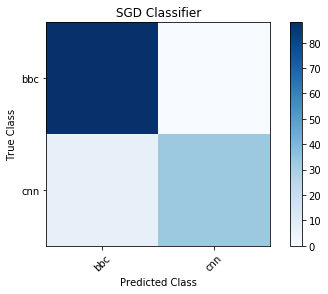

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
ref = [org for (art, org) in test_set]
test = [SGD_classifier.classify(art) for (art, org) in test_set]

cm = nltk.ConfusionMatrix(ref, test)
print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

sklcm = confusion_matrix(ref, test)
np.set_printoptions(precision=2)

def plot_cm(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
plt.figure()
plot_cm(sklcm, classes=['bbc', 'cnn'], title='SGD Classifier')
plt.show()

## Save Classifiers

In [5]:
# Save Classifiers
import pickle

pickle.dump(classifier, open('./Classifiers/classifier.pickle', 'wb'))
pickle.dump(SGD_classifier, open('./Classifiers/sgd_classifier.pickle', 'wb'))